In [ ]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [4]:
pip install tensorflow --default-timeout=1000

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)


  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 826.2 kB/s eta 0:00:00 eta 0:00:01m36m0:00:12m
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 976.6 kB/s eta 0:00:00m eta 0:00:010:00:01
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
U

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import cv2
from glob import glob
import os
import tensorflow as tf

In [12]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [14]:
import cv2
import imghdr

In [15]:
data_dir = 'data/'

In [16]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [17]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [19]:
os.listdir(data_dir)

['happy', 'sad']

In [25]:
# img = cv2.imread(os.path.join('data','happy','image21.jpeg'))

# plt.imshow(img)
# img.shape

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext lis {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

Image not in ext lis data/happy/how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext lis data/happy/Happy20People.jpg


libpng warning: iCCP: known incorrect sRGB profile


Image not in ext lis data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg


In [27]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


In [28]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
data_iterator = data.as_numpy_iterator()

In [39]:
# Get another batch from iterator
batch = data_iterator.next()

In [33]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [40]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
batch[1]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

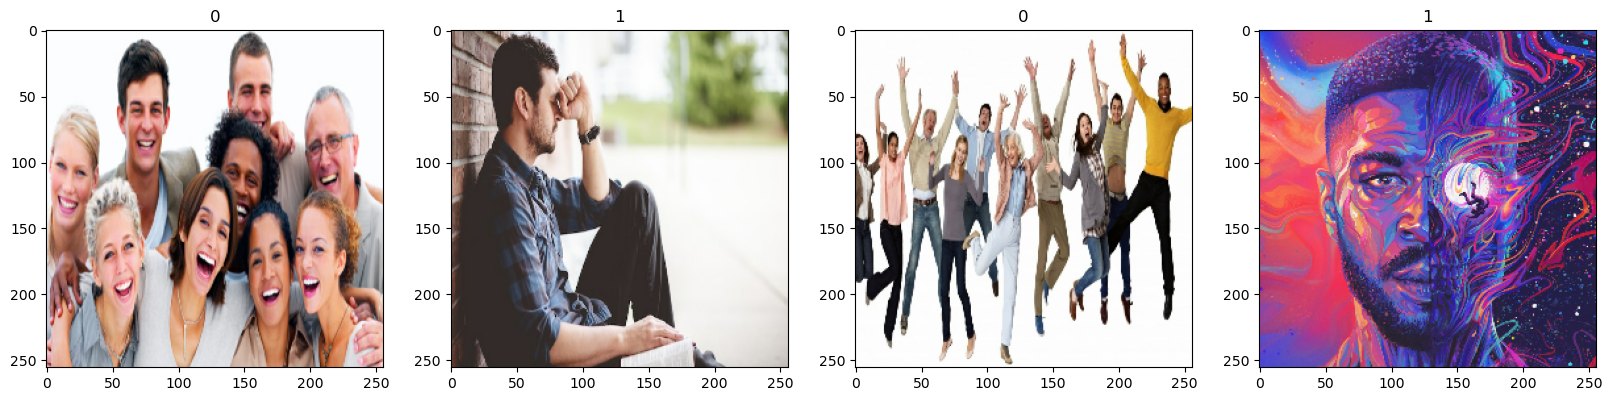

In [41]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [42]:
scaled = batch[0] /255

In [49]:
data = data.map(lambda x, y: (x/255, y))

In [59]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

2023-12-11 23:16:02.403587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [60]:
batch[1].max()

1

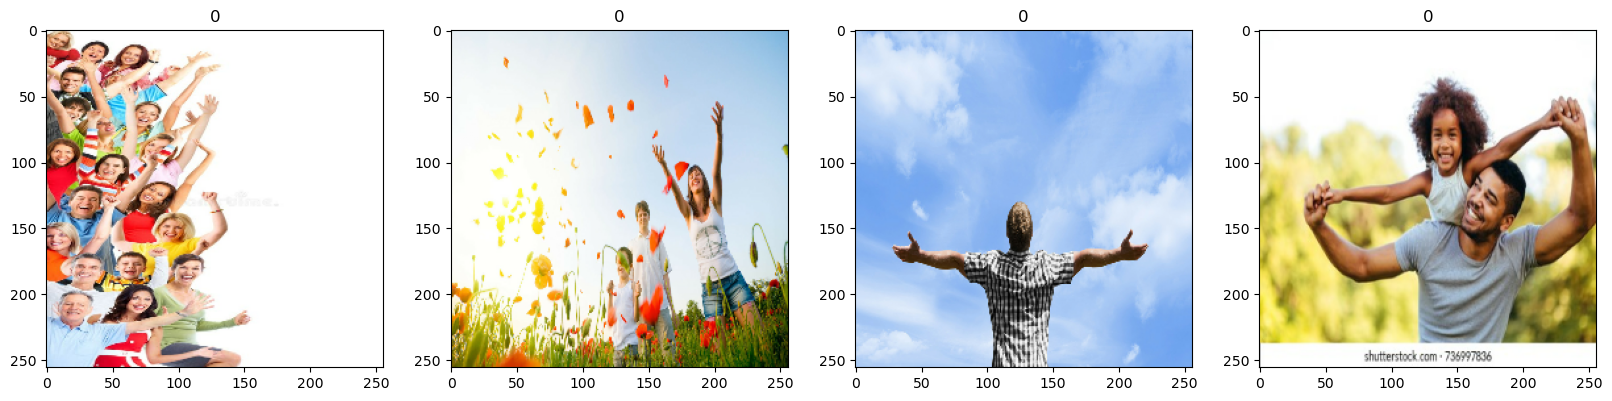

In [61]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [243]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)+1
# test_size = int(len(data)*.1)+1

data_length = len(data)  # Assume this is the length of your dataset
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [244]:
test_size+train_size+val_size

6

In [245]:
len(data)

6

In [286]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size)

In [308]:
len(val)

1

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [150]:
model = Sequential()

In [309]:
# Clear the current model (this is necessary in a Jupyter Notebook environment)
from tensorflow.keras import backend as K
K.clear_session()

# Now, redefine the model as shown above

In [276]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D())

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [310]:
# Define a new model
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [311]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [312]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [314]:
logdir = 'logs'

In [222]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True)
# reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
# early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [313]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [315]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-12-12 02:13:02.126293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 2.3291 - accuracy: 0.4141

2023-12-12 02:13:08.339811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 10s 2s/step - loss: 2.3291 - accuracy: 0.4141 - val_loss: 0.8201 - val_accuracy: 0.4375
Epoch 2/20


2023-12-12 02:13:09.842717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.7814 - accuracy: 0.5469

2023-12-12 02:13:15.747294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 8s 2s/step - loss: 0.7814 - accuracy: 0.5469 - val_loss: 0.6395 - val_accuracy: 0.6250
Epoch 3/20


2023-12-12 02:13:17.999111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.7578

2023-12-12 02:13:24.847387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.5973 - accuracy: 0.7578 - val_loss: 0.5489 - val_accuracy: 0.6562
Epoch 4/20


2023-12-12 02:13:26.792424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5270 - accuracy: 0.7500

2023-12-12 02:13:33.426771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.5270 - accuracy: 0.7500 - val_loss: 0.4412 - val_accuracy: 0.8750
Epoch 5/20


2023-12-12 02:13:35.407816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8672

2023-12-12 02:13:42.250965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.4241 - accuracy: 0.8672 - val_loss: 0.2568 - val_accuracy: 0.9062
Epoch 6/20


2023-12-12 02:13:44.104367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3209 - accuracy: 0.8906

2023-12-12 02:13:51.049453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.3209 - accuracy: 0.8906 - val_loss: 0.3707 - val_accuracy: 0.8750
Epoch 7/20


2023-12-12 02:13:52.896229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.8047

2023-12-12 02:13:59.534635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.3834 - accuracy: 0.8047 - val_loss: 0.1590 - val_accuracy: 0.9375
Epoch 8/20


2023-12-12 02:14:01.580637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.9219

2023-12-12 02:14:09.240149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 10s 2s/step - loss: 0.2377 - accuracy: 0.9219 - val_loss: 0.1399 - val_accuracy: 0.9688
Epoch 9/20


2023-12-12 02:14:11.259480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.9141

2023-12-12 02:14:18.260234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.2178 - accuracy: 0.9141 - val_loss: 0.1894 - val_accuracy: 0.9062
Epoch 10/20


2023-12-12 02:14:20.327488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9688

2023-12-12 02:14:27.333831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.1461 - accuracy: 0.9688 - val_loss: 0.2255 - val_accuracy: 0.9375
Epoch 11/20


2023-12-12 02:14:29.324626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9609

2023-12-12 02:14:36.675560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.1331 - accuracy: 0.9609 - val_loss: 0.1446 - val_accuracy: 0.9688
Epoch 12/20


2023-12-12 02:14:38.635071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9688

2023-12-12 02:14:45.541432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.0771 - val_accuracy: 0.9688
Epoch 13/20


2023-12-12 02:14:47.467110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.9609

2023-12-12 02:14:54.417839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.1009 - accuracy: 0.9609 - val_loss: 0.0751 - val_accuracy: 0.9688
Epoch 14/20


2023-12-12 02:14:56.490509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 1.0000

2023-12-12 02:15:03.796340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 15/20


2023-12-12 02:15:05.712858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9922

2023-12-12 02:15:12.609328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0553 - accuracy: 0.9922 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 16/20


2023-12-12 02:15:14.567136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9844

2023-12-12 02:15:21.677645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0640 - accuracy: 0.9844 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 17/20


2023-12-12 02:15:23.702710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9922

2023-12-12 02:15:30.742060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0545 - accuracy: 0.9922 - val_loss: 0.0624 - val_accuracy: 0.9688
Epoch 18/20


2023-12-12 02:15:32.808962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9844

2023-12-12 02:15:40.099205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0419 - accuracy: 0.9844 - val_loss: 0.0866 - val_accuracy: 0.9688
Epoch 19/20


2023-12-12 02:15:41.982754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 1.0000

2023-12-12 02:15:48.952105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 20/20


2023-12-12 02:15:50.870240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 1.0000

2023-12-12 02:15:58.229203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 9s 2s/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000


In [252]:
# # Train the model with the new callbacks
# hist = model.fit(
#     train,
#     epochs=20,
#     validation_data=val,
#     callbacks=[tensorboard_callback, checkpoint_cb, reduce_lr_cb, early_stopping_cb]
# )

In [254]:
hist.history

{'loss': [2.0655672550201416,
  0.6633967757225037,
  0.60593581199646,
  0.5190286636352539,
  0.4533542990684509,
  0.3504772186279297,
  0.29813918471336365,
  0.25805726647377014,
  0.16577354073524475,
  0.15607495605945587,
  0.13880157470703125,
  0.10516718775033951,
  0.0959470272064209,
  0.05845370143651962,
  0.059844911098480225,
  0.04006705433130264,
  0.029082927852869034,
  0.031749092042446136,
  0.026956524699926376,
  0.008495400659739971],
 'accuracy': [0.4609375,
  0.6640625,
  0.703125,
  0.7421875,
  0.8125,
  0.8671875,
  0.890625,
  0.921875,
  0.9375,
  0.953125,
  0.9296875,
  0.96875,
  0.9609375,
  1.0,
  0.984375,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.6413290500640869,
  0.6231452822685242,
  0.5500460863113403,
  0.4535938799381256,
  0.3681880533695221,
  0.2104862630367279,
  0.2565729022026062,
  0.15520142018795013,
  0.1766957938671112,
  0.06899011135101318,
  0.09521325677633286,
  0.02445206604897976,
  0.035

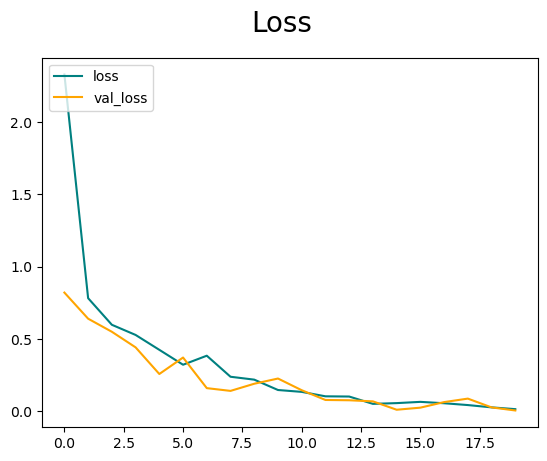

In [316]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

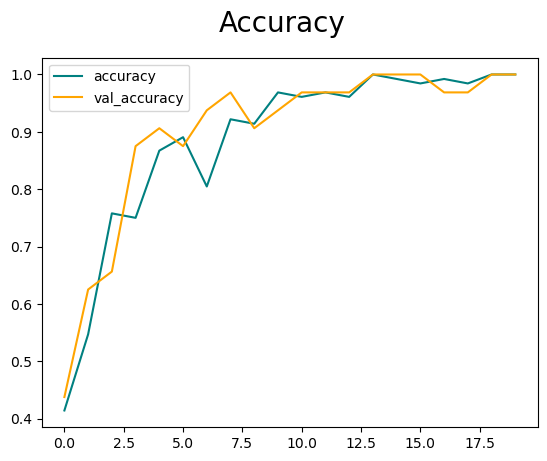

In [317]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [332]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [333]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [334]:
len(test)

1

In [335]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-12-12 02:21:47.587181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 102ms/step


In [336]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


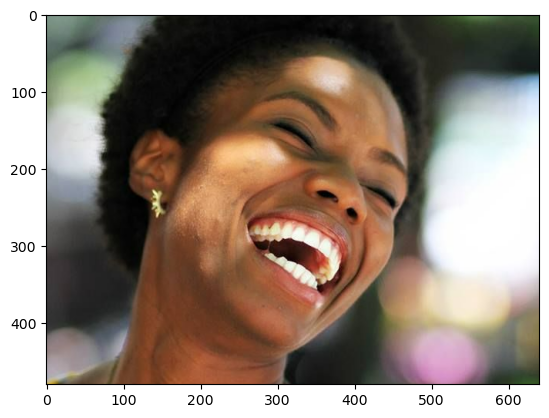

In [337]:
img = cv2.imread('happy1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

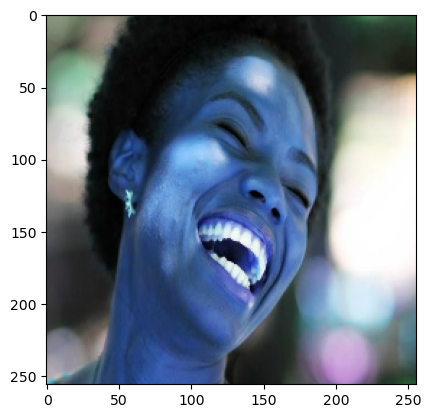

In [338]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [339]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [340]:
yhat

array([[0.9999918]], dtype=float32)

In [341]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [139]:
from tensorflow.keras.models import load_model

In [141]:
# model.save(os.path.join('models','happysadmodels.h5'))

In [142]:
new_model = load_model(os.path.join('models', 'happysadmodels.h5'))

In [143]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 127ms/step


In [144]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
